# Лабораторная работа 5.1

## Классификация диабета с использованием логистической регрессии и решающих деревьев

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, f1_score, roc_curve, auc, precision_recall_curve


In [6]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## 1. Логистическая регрессия

In [8]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log))

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.77      0.86      0.81       150
           1       0.67      0.52      0.58        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231



## 2. Дерево решений (по умолчанию)

In [9]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print("Decision Tree Report:\n", classification_report(y_test, y_pred_tree))

Decision Tree Report:
               precision    recall  f1-score   support

           0       0.78      0.87      0.83       150
           1       0.70      0.56      0.62        81

    accuracy                           0.76       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.76      0.76      0.75       231



## 3. Анализ F1-метрики в зависимости от глубины дерева

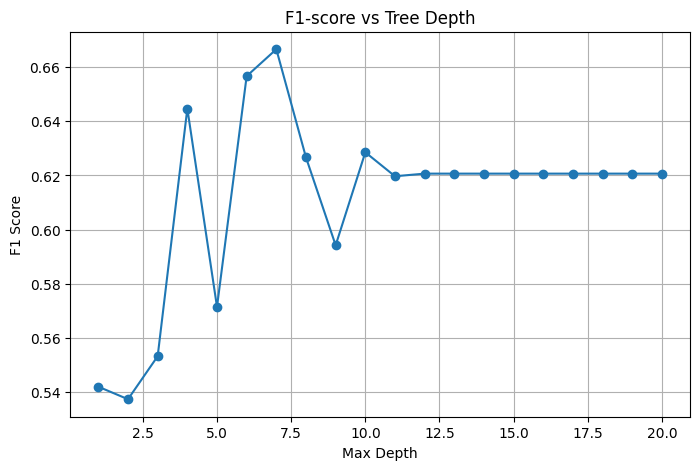

In [10]:
depths = range(1, 21)
f1_scores = []
for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1_scores.append(f1_score(y_test, y_pred))

plt.figure(figsize=(8, 5))
plt.plot(depths, f1_scores, marker='o')
plt.title("F1-score vs Tree Depth")
plt.xlabel("Max Depth")
plt.ylabel("F1 Score")
plt.grid(True)
plt.show()

## 4. Визуализация дерева и важности признаков

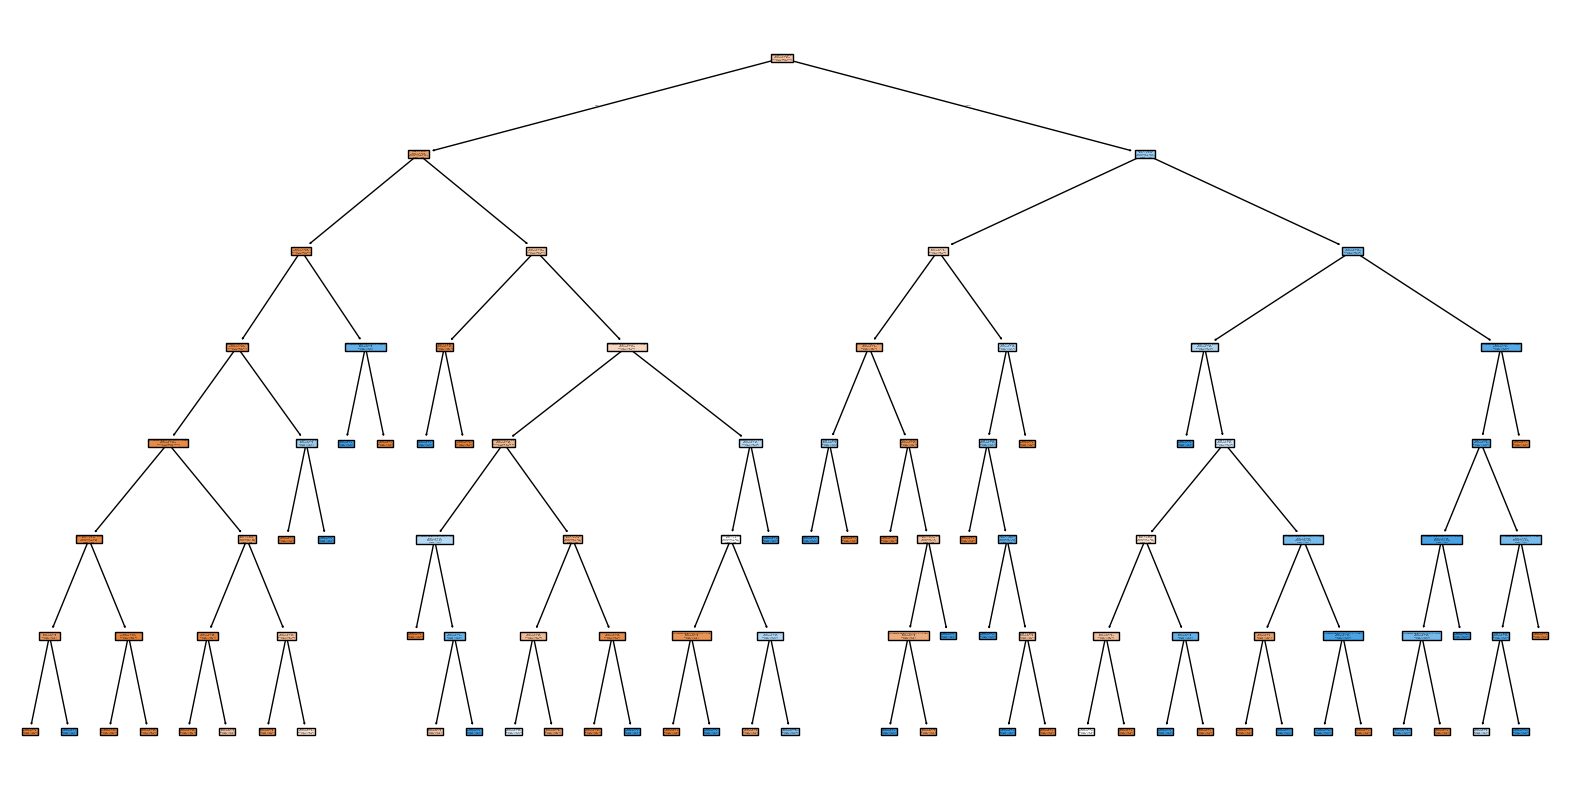

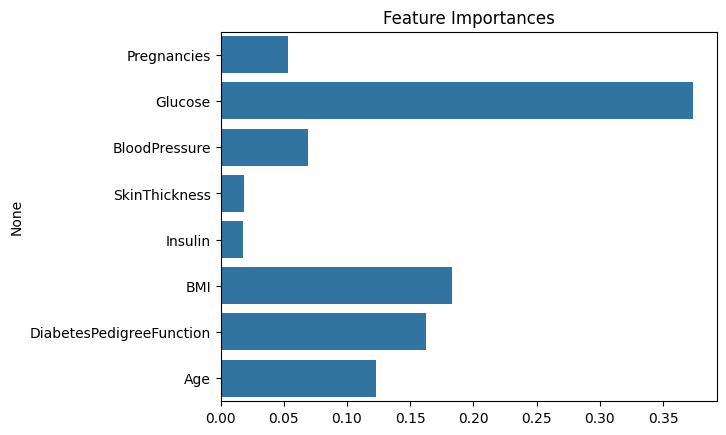

In [13]:
best_depth = depths[np.argmax(f1_scores)]
best_tree = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
best_tree.fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(best_tree, feature_names=X.columns, class_names=["No", "Yes"], filled=True)
plt.show()

importances = best_tree.feature_importances_
sns.barplot(x=importances, y=X.columns)
plt.title("Feature Importances")
plt.show()

## ROC и PR-кривые

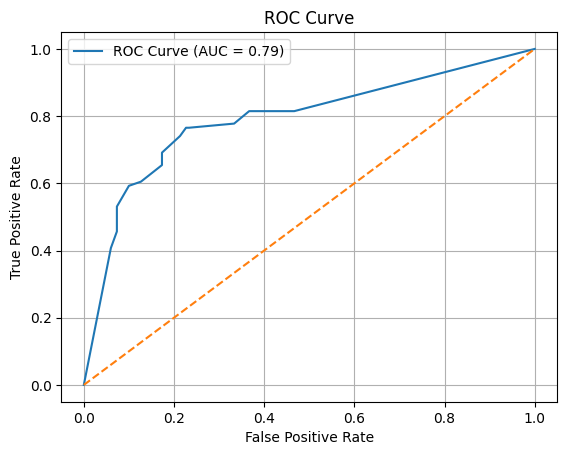

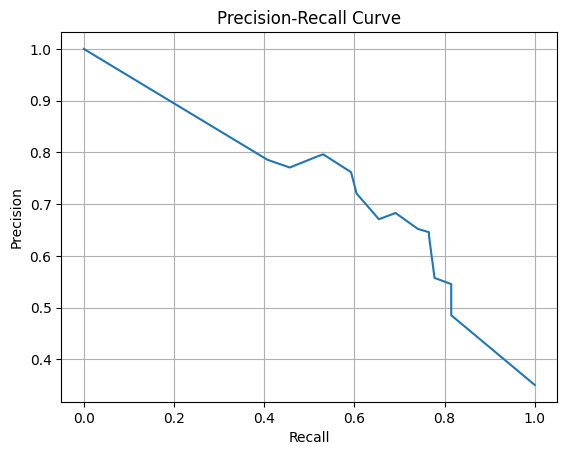

In [12]:
y_prob = best_tree.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.plot(recall, precision)
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.show()